# Text to Spectrogram Generator

In [146]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import IPython
import wave
import os

In [147]:
def plot_play_audio(path, sr):
	wf = wave.open(path,'rb')
	w = wf.readframes(-1)
	sig = np.frombuffer(w,'int16')
	x = torch.arange(0,len(sig)/sr, 1./sr)
	plt.plot(x,sig)
	plt.title(f'Label:{path}')
	plt.xlabel('Seconds')
	plt.ylabel('Amplitude')
	plt.grid()
	plt.show()
	return(sig)

## Text => Spectrogram estimation => rough wav reconstruction w/ Griffing Lim

In [102]:
!./tts_vctk.sh 5

2021-10-26 19:09:22 | INFO | __main__ | Namespace(no_progress_bar=False, log_interval=100, log_format=None, log_file=None, tensorboard_logdir=None, wandb_project=None, azureml_logging=False, seed=1, cpu=False, tpu=False, bf16=False, memory_efficient_bf16=False, fp16=False, memory_efficient_fp16=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, on_cpu_convert_precision=False, min_loss_scale=0.0001, threshold_loss_scale=None, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, user_dir=None, empty_cache_freq=0, all_gather_list_size=16384, model_parallel_size=1, quantization_config_path=None, profile=False, reset_logging=False, suppress_crashes=False, use_plasma_view=False, plasma_path='/tmp/plasma', criterion='cross_entropy', tokenizer=None, bpe=None, optimizer=None, lr_scheduler='fixed', scoring='bleu', task='text_to_speech', num_workers=1, skip_invalid_size_inputs_valid_test=False, max_tokens=50000, batch_s

## Test Text

In [111]:
!cut -f1,6 '/home/syl20/data/en/vctk_old/fairseq/features/test.10.tsv'

id	src_text
p231_013	Some have accepted it as a miracle without physical explanation. 
p231_461	They were good years for him.
p233_059	There was no safety net.
p233_064	It was an amazing result.
p233_084	It is not a story.
p233_348	The decision is an absolute disgrace.


In [94]:
!cd /home/syl20/data/en/vctk_old/fairseq/results/wav_22050hz_griffin_lim; ls

p225_011.wav  p230_013.wav  p231_461.wav  p233_064.wav	p233_348.wav
p228_011.wav  p231_013.wav  p233_059.wav  p233_084.wav


In [145]:
!ls /home/syl20/data/en/vctk_old/fairseq/results/wav_22050hz_griffin_lim

p230_013.wav  p231_461.wav  p233_064.wav  p233_348.wav
p231_013.wav  p233_059.wav  p233_084.wav


## Spectrogram Generation from Text

In [117]:
id = 'p233_064'

(292, 80)
(292, 80)


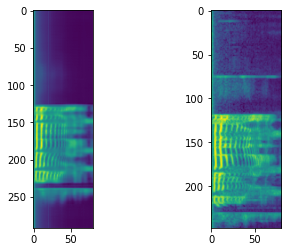

In [130]:
import os
result_dir = '/home/syl20/data/en/vctk_old/fairseq/results'
feats = np.load(os.path.join(result_dir, 'feat', id +'.npy'))
print(feats.shape)
feats_gt = np.load(os.path.join(result_dir, 'feat_tgt', id +'.npy'))
print(feats.shape)

plt.subplot(1,2,1)
plt.imshow(feats)
plt.subplot(1,2,2)
plt.imshow(feats_gt)

In [131]:
# format for gan
feats = torch.Tensor(feats).unsqueeze(dim=0).transpose(1,2)
print(feats.shape)
with open('/home/syl20/hifi-gan/test_mel_files/fairseq.npy','wb') as f:
    np.save(f,feats)

torch.Size([1, 80, 292])


## Audio generation from spectrogram

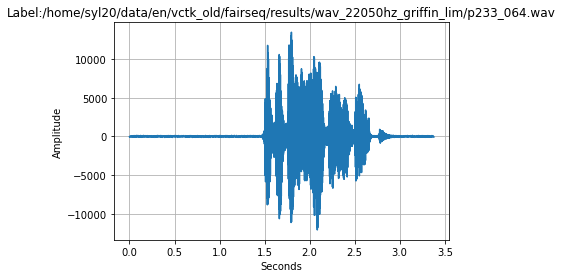

In [119]:
root = '/home/syl20/data/en/vctk_old/fairseq/results/wav_22050hz_griffin_lim'
audio_file = id + '.wav'
path = os.path.join(root, audio_file)
sig = plot_play_audio(path, 22050)
IPython.display.Audio(sig, rate=22050)

# Original audio from vctk multi-speaker set (not synthesized)

In [140]:
import torchaudio

In [141]:
w = torchaudio.load('/home/syl20/data/en/vctk_old/VCTK-Corpus/wav48/p233/p233_064.wav')

In [142]:
IPython.display.Audio(w[0].numpy(), rate=w[1])